In [33]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
opSimVisits = pd.read_csv('/Users/rbiswas/doc/projects/LSST/Twinkles/code/SN_sims/SelectedKrakenVisits.csv',
                          index_col='obsHistID')

In [3]:
opSimVisits.head()

,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,visitTime,...,darkBright,rawSeeing,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,obsID
obsHistID,,,,,,,,,,,,,,,,,,,,,
220,1042,152,1427,0.925184,-0.4789,g,11699,59580.135415,0,34,...,84.048697,0.869226,0,0,0.000000,120,24.357859,0.907976,-0.505351,220
230,1042,152,1427,0.925184,-0.4789,i,12177,59580.140948,0,34,...,84.905894,0.791241,0,0,0.000000,120,23.529519,0.907976,-0.505351,230
200,1042,152,1427,0.925184,-0.4789,r,10861,59580.125716,0,34,...,82.698160,0.744120,0,0,0.837387,140,24.234817,0.907976,-0.505351,200
276,1042,152,1427,0.925184,-0.4789,y,14069,59580.162846,0,34,...,89.102576,1.132846,0,0,0.000000,120,21.187902,0.907976,-0.505351,276
250,1042,152,1427,0.925184,-0.4789,z,13015,59580.150647,0,34,...,86.600272,0.928894,0,0,0.000000,120,22.841986,0.907976,-0.505351,250


In [36]:
surveyStartDate = 59580

In [4]:
krakenObs = pd.read_csv('krakenvists_twinkles.csv', index_col='obsHistID')

In [5]:
krakenObs.head()

,Unnamed: 0,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,mag_6000184645801,mag_6000184408901,mag_6000043638100,mag_6001586473901,mag_6000269054205,mag_6001531895002,mag_6000321245000,mag_6001417557202,mag_6000637885901,mag_6000221385203
obsHistID,,,,,,,,,,,,,,,,,,,,,
220,0,1042,152,1427,0.925184,-0.4789,g,11699,59580.135415,0,...,28.266336,27.866121,27.697391,28.145976,28.526304,28.404733,28.418325,28.005642,28.323475,27.438158
230,1,1042,152,1427,0.925184,-0.4789,i,12177,59580.140948,0,...,27.617377,27.784248,27.275260,27.878113,27.823338,28.086856,27.926815,27.864636,27.884126,27.228839
200,2,1042,152,1427,0.925184,-0.4789,r,10861,59580.125716,0,...,27.536583,27.479861,27.140664,27.601803,27.763960,27.868612,27.766292,27.558418,27.694935,27.015630
276,3,1042,152,1427,0.925184,-0.4789,y,14069,59580.162846,0,...,27.297952,27.498321,27.244944,27.282763,27.503450,27.734839,27.486826,27.409329,27.393466,27.239481
250,4,1042,152,1427,0.925184,-0.4789,z,13015,59580.150647,0,...,27.639220,27.791272,27.483809,27.668637,27.848579,28.062127,27.850256,27.750957,27.766323,27.452931


In [7]:
krakenObs['fsD'] = opSimVisits['fiveSigmaDepth']

In [9]:
sncols = [x for x in krakenObs.columns if x.startswith('mag_')]
HSNR_sn = [x for x in sncols if (krakenObs[x] - krakenObs['fsD']).min() < 0.]

In [10]:
print len(HSNR_sn), len(sncols)

1077 13883


In [19]:
HsnrID = [int(x.split('_')[1]) for x in HSNR_sn]

In [12]:
twinklesSN = pd.read_csv('kraken_sim.csv', index_col='snid')

In [17]:
twinklesSN.index

Int64Index([6001014685800, 6000001337700, 6000067275900, 6001014687900,
            6000635785100, 6000003901100, 6000223131300, 6001014685801,
            6000222594300, 6001014700100,
            ...
            6000639100002, 6000184833700, 6000124769101, 6000453898403,
            6000637885901, 6001355552000, 6000639693502, 6000879935200,
            6001171318102, 6000221385203],
           dtype='int64', name=u'snid', length=307900)

In [122]:
sns.set_context('notebook')

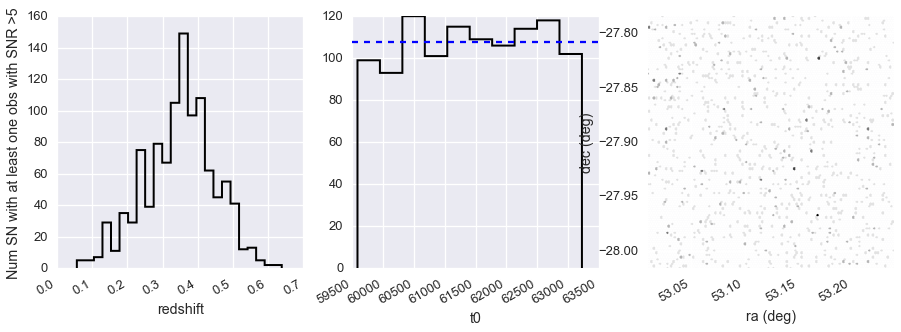

In [110]:
fig, ax = plt.subplots(1, 3, **{'figsize': (15, 5)})
sns.distplot(twinklesSN.ix[HsnrID, 'redshift'], rug=False, kde=False,
             hist_kws={'histtype':'step', 'alpha':1, 'color':'k', 'lw':2}, ax=ax[0])
ax[0].set_ylabel('Num SN with at least one obs with SNR >5')
t0hist = sns.distplot(twinklesSN.ix[HsnrID, 't0'] + surveyStartDate, rug=False, kde=False, bins=10,
             hist_kws={'histtype':'step', 'alpha':1, 'color':'k', 'lw':2}, ax=ax[1])
t0hist.axhline(np.mean(np.histogram(twinklesSN.ix[HsnrID, 't0'] + surveyStartDate, bins=10)[0]), linestyle='dashed')
t0hist.figure.autofmt_xdate()
#sns.jointplot(x=twinklesSN.ix[HsnrID]['snra'], y=twinklesSN.ix[HsnrID]['sndec'], kind="hex", color="k", ax=ax[2]);
ax[2].hexbin(twinklesSN.ix[HsnrID]['snra'], twinklesSN.ix[HsnrID]['sndec'])
ax[2].set_xlabel('ra (deg)')
ax[2].set_ylabel('dec (deg)')

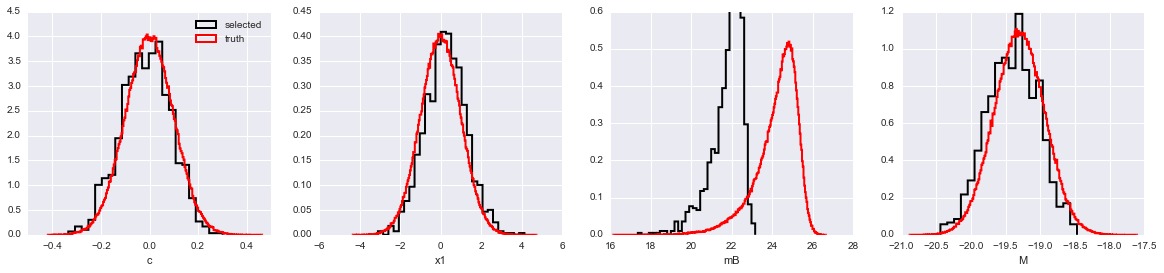

In [169]:
fig, ax = plt.subplots(1, 4, **{'figsize':(20, 4)})
sns.distplot(twinklesSN.ix[HsnrID, 'c'], hist_kws={'histtype':'step', 'lw':2, 'color':'k', 'alpha':1},
             rug=False, ax=ax[0], norm_hist=True, kde=False, label='selected')
sns.distplot(twinklesSN.c, hist_kws={'histtype':'step', 'lw':2, 'color':'r', 'alpha':1}, rug=False, ax=ax[0],
            norm_hist=True, kde=False, label='truth')

sns.distplot(twinklesSN.ix[HsnrID, 'x1'], hist_kws={'histtype':'step', 'lw':2, 'color':'k', 'alpha':1},
             rug=False, ax=ax[1], norm_hist=True, kde=False)
sns.distplot(twinklesSN.x1, hist_kws={'histtype':'step', 'lw':2, 'color':'r', 'alpha':1}, rug=False, ax=ax[1],
            norm_hist=True, kde=False)

sns.distplot(twinklesSN.ix[HsnrID, 'M'], hist_kws={'histtype':'step', 'lw':2, 'color':'k', 'alpha':1},
             rug=False, ax=ax[3], kde=False, norm_hist=True)
sns.distplot(twinklesSN.M, hist_kws={'histtype':'step', 'lw':2, 'color':'r', 'alpha':1}, rug=False, ax=ax[3], 
             kde=False, norm_hist=True)

sns.distplot(twinklesSN.ix[HsnrID, 'mB'], hist_kws={'histtype':'step', 'lw':2, 'color':'k', 'alpha':1},
             rug=False, ax=ax[2], kde=False, norm_hist=True)
sns.distplot(twinklesSN.mB, hist_kws={'histtype':'step', 'lw':2, 'color':'r', 'alpha':1}, rug=False, ax=ax[2], 
             kde=False, norm_hist=True)


ax[0].legend(loc='best')

## Detections per Image

In [123]:
mycols = ['fsD'] + HSNR_sn

In [172]:
obsvals = krakenObs[mycols].copy(deep=True)

In [173]:
for col in HSNR_sn:
    obsvals[col] = np.where(obsvals[col] - obsvals['fsD'] < 0, 1, 0)

In [215]:
sns.set_context('talk')

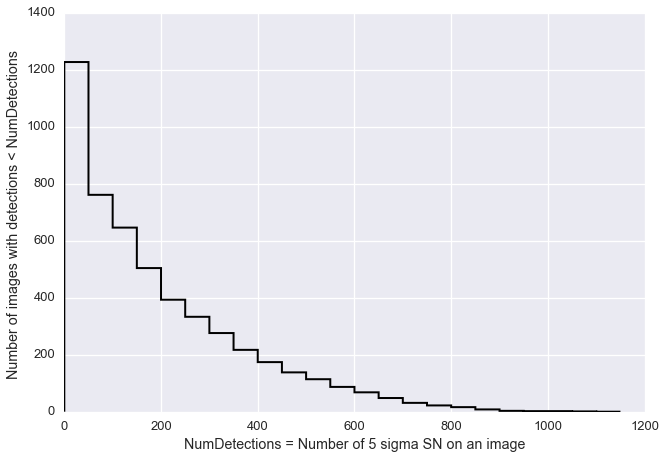

In [216]:
fig, ax = plt.subplots()
_ = ax.hist(obsvals[HSNR_sn].sum(axis=1).values, cumulative=-1, 
         histtype='step', lw=2., alpha=1., bins=np.arange(0,1200,50), color='k')
ax.set_xlabel("NumDetections = Number of 5 sigma SN on an image")
#ax.set_yscale('log')
_ = ax.set_ylabel("Number of images with detections < NumDetections ")
_ = ax.set_title('Note: Cumulative Plot')

In [ ]:
fig

In [213]:
fig.savefig('NumberOfDetections.png')

In [187]:
obsvals[HSNR_sn].sum(axis=1).values

array([317, 180, 543, ..., 401,  22,  79])

In [128]:
obsvals = obsvals[HSNR_sn]

In [171]:
np.where(obsvals[HSNR_sn[-1]] - obsvals['fsD'] < 0 , 1, 0).sum()

2

In [157]:
twinklesSN.ix[HsnrID,'redshift']

snid
6000068561600    0.0943
6000000563900    0.0806
6000000563901    0.0806
6000456681900    0.0563
6000018388500    0.0993
6001298854000    0.0785
6000011371600    0.0805
6000029190500    0.0808
6000011373800    0.0805
6000011373801    0.0805
6000005864600    0.1362
6000732728000    0.1314
6000439026600    0.1489
6000730813700    0.1267
6000257604700    0.1482
6000519497500    0.1492
6000314620700    0.1445
6000257604701    0.1482
6000733329900    0.1237
6000858772300    0.1435
6000147691900    0.1291
6000025898000    0.1368
6001523857800    0.1327
6000858772301    0.1435
6000213229800    0.1482
6000981572900    0.1499
6001524169900    0.1266
6000061069800    0.1498
6001405450100    0.1289
6000858772302    0.1435
                  ...  
6001310916600    0.5103
6001056917201    0.5338
6001054937401    0.5054
6001053612900    0.5080
6000337483000    0.5127
6000906864600    0.5131
6001310916602    0.5103
6001189563801    0.5436
6000336839900    0.5169
6001493319600    0.5415
60010567085

In [158]:
krakenObs[['night', HSNR_sn[-1]]]

,night,mag_6000235498100
obsHistID,,
220,0,25.218976
230,0,24.945321
200,0,24.775820
276,0,25.116071
250,0,25.279574
1637,2,26.606322
2226,3,26.606322
2942,4,26.606322
3665,5,26.606322


In [135]:
HSNR_sn[0]

'mag_6000068561600'

# Scratch

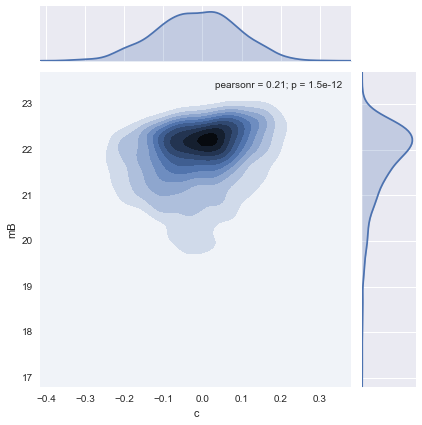

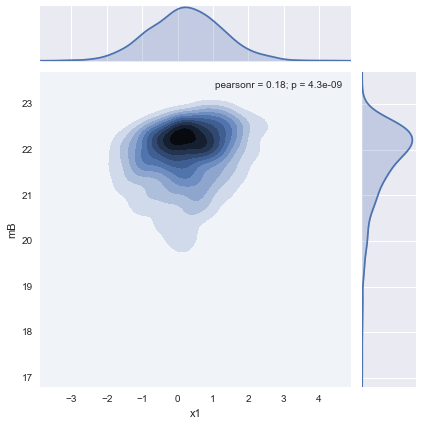

In [165]:
sns.jointplot(x=twinklesSN.ix[HsnrID, 'c'], y=twinklesSN.ix[HsnrID, 'mB'],kind='kde')
sns.jointplot(x=twinklesSN.ix[HsnrID, 'x1'], y=twinklesSN.ix[HsnrID, 'mB'],kind='kde')




In [130]:
obsvals.mag_6000000563900.sum()

1123